___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Text Classification Assessment 

### Goal: Given a set of text movie reviews that have been labeled negative or positive

For more information on this dataset visit http://ai.stanford.edu/~amaas/data/sentiment/

## Complete the tasks in bold below!

**Task: Perform imports and load the dataset into a pandas DataFrame**
For this exercise you can load the dataset from `'../DATA/moviereviews.csv'`.

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('../DATA/moviereviews.csv')

In [3]:
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


In [4]:
len(df)

2000

**TASK: Check to see if there are any missing values in the dataframe.**

In [5]:
df.isna().sum()

label      0
review    35
dtype: int64

**TASK: Remove any reviews that are NaN**

In [6]:
df = df.dropna()

In [7]:
len(df)

1965

**TASK: Check to see if any reviews are blank strings and not just NaN. Note: This means a review text could just be: "" or "  " or some other larger blank string. How would you check for this? Note: There are many ways! Once you've discovered the reviews that are blank strings, go ahead and remove them as well. [Click me for a big hint](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.isspace.html)**

In [8]:
len(df[df['review'].str.isspace() == True])

27

In [9]:
df = df[~df['review'].str.isspace()]

**TASK: Confirm the value counts per label:**

In [10]:
df['label'].value_counts()

label
neg    969
pos    969
Name: count, dtype: int64

## EDA on Bag of Words

**Bonus Task: Can you figure out how to use a CountVectorizer model to get the top 20 words (that are not english stop words) per label type? Note, this is a bonus task as we did not show this in the lectures. But a quick cursory Google search should put you on the right path.  [Click me for a big hint](https://stackoverflow.com/questions/16288497/find-the-most-common-term-in-scikit-learn-classifier)**

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

In [12]:
cv = CountVectorizer(stop_words='english')

In [13]:
matrix = cv.fit_transform(df[df['label']=="neg"]['review'])
freqs = zip(cv.get_feature_names_out(), matrix.sum(axis=0).tolist()[0])
# sort from largest to smallest
print("Top 20 words used for Negative reviews.")
print(sorted(freqs, key=lambda x: -x[1])[:20])

Top 20 words used for Negative reviews.
[('film', 4063), ('movie', 3131), ('like', 1808), ('just', 1480), ('time', 1127), ('good', 1117), ('bad', 997), ('character', 926), ('story', 908), ('plot', 888), ('characters', 838), ('make', 813), ('really', 743), ('way', 734), ('little', 696), ('don', 683), ('does', 666), ('doesn', 648), ('action', 635), ('scene', 634)]


In [14]:
matrix = cv.fit_transform(df[df['label']=='pos']['review'])
freqs = zip(cv.get_feature_names_out(), matrix.sum(axis=0).tolist()[0])    
# sort from largest to smallest
print("Top 20 words used for Positive reviews.")
print(sorted(freqs, key=lambda x: -x[1])[:20])

Top 20 words used for Positive reviews.
[('film', 5002), ('movie', 2389), ('like', 1721), ('just', 1273), ('story', 1199), ('good', 1193), ('time', 1175), ('character', 1037), ('life', 1032), ('characters', 957), ('way', 864), ('films', 851), ('does', 828), ('best', 788), ('people', 769), ('make', 764), ('little', 751), ('really', 731), ('man', 728), ('new', 702)]


### Training and Data

**TASK: Split the data into features and a label (X and y) and then preform a train/test split. You may use whatever settings you like. To compare your results to the solution notebook, use `test_size=0.20, random_state=101`**

In [15]:
X = df['review']
y = df['label']

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=101)

In [18]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((1550,), (1550,), (388,), (388,))

### Training a Mode

**TASK: Create a PipeLine that will both create a TF-IDF Vector out of the raw text data and fit a supervised learning model of your choice. Then fit that pipeline on the training data.**

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [20]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [21]:
from sklearn.pipeline import Pipeline

In [22]:
svc_pipe = Pipeline([('tfidf',TfidfVectorizer()),('svc',SVC())])

In [23]:
svc_pipe.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', SVC())])

In [24]:
linear_svc = Pipeline([('tfidf',TfidfVectorizer()),('svc',LinearSVC(dual='auto'))])

In [25]:
linear_svc.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC(dual='auto'))])

In [26]:
nb_model = Pipeline([('tfidf',TfidfVectorizer()),('nb',MultinomialNB())])

In [27]:
nb_model.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('nb', MultinomialNB())])

In [28]:
log_model = Pipeline([('tfidf',TfidfVectorizer()),('log',LogisticRegression())])

In [29]:
log_model.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('log', LogisticRegression())])

In [30]:
knn_model = Pipeline([('tfidf',TfidfVectorizer()),('knn',KNeighborsClassifier())])

In [31]:
knn_model.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('knn', KNeighborsClassifier())])

**TASK: Create a classification report and plot a confusion matrix based on the results of your PipeLine.**

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

In [33]:
def report(model):
    
    preds = model.predict(X_test)
    
    print(classification_report(y_test,preds))
    ConfusionMatrixDisplay.from_predictions(y_test, preds)

              precision    recall  f1-score   support

         neg       0.81      0.85      0.83       191
         pos       0.85      0.80      0.83       197

    accuracy                           0.83       388
   macro avg       0.83      0.83      0.83       388
weighted avg       0.83      0.83      0.83       388



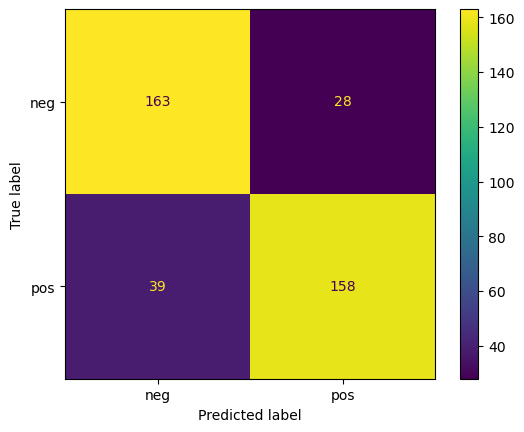

In [34]:
report(svc_pipe)

              precision    recall  f1-score   support

         neg       0.81      0.86      0.83       191
         pos       0.85      0.81      0.83       197

    accuracy                           0.83       388
   macro avg       0.83      0.83      0.83       388
weighted avg       0.83      0.83      0.83       388



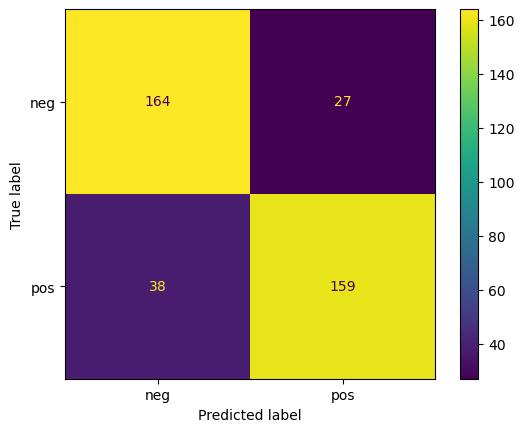

In [35]:
report(linear_svc)

              precision    recall  f1-score   support

         neg       0.75      0.92      0.83       191
         pos       0.90      0.70      0.79       197

    accuracy                           0.81       388
   macro avg       0.83      0.81      0.81       388
weighted avg       0.83      0.81      0.81       388



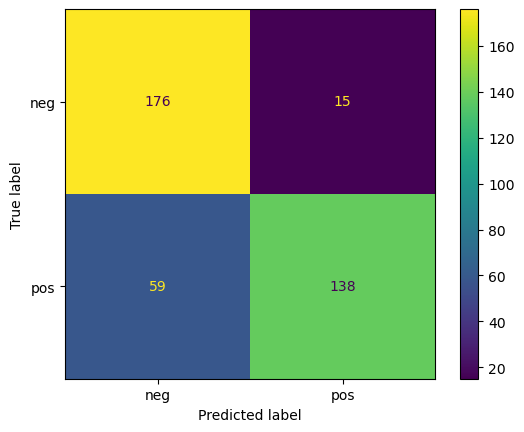

In [36]:
report(nb_model)

              precision    recall  f1-score   support

         neg       0.80      0.85      0.82       191
         pos       0.84      0.79      0.82       197

    accuracy                           0.82       388
   macro avg       0.82      0.82      0.82       388
weighted avg       0.82      0.82      0.82       388



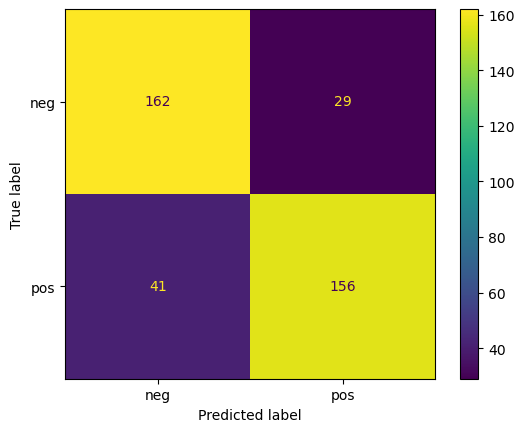

In [37]:
report(log_model)

              precision    recall  f1-score   support

         neg       0.84      0.26      0.39       191
         pos       0.57      0.95      0.71       197

    accuracy                           0.61       388
   macro avg       0.71      0.61      0.55       388
weighted avg       0.71      0.61      0.56       388



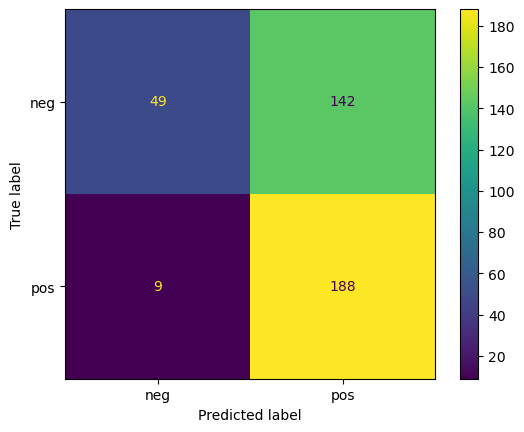

In [38]:
report(knn_model)

## Great job!